# Template Matching

### Full Image

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
bmw = cv2.imread('bmw_m3GTR.png')
bmw = cv2.cvtColor(bmw, cv2.COLOR_BGR2RGB)
bmw.shape

(642, 1148, 3)

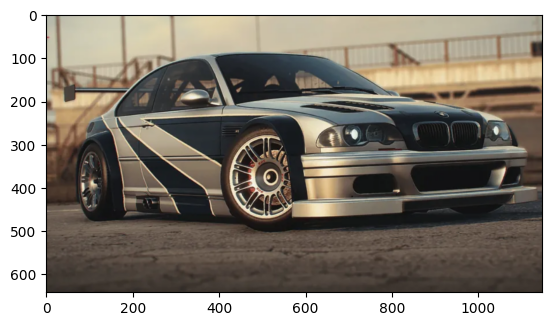

In [13]:
plt.imshow(bmw)

### Template Image

A subset of the image. Note how its actually the exact image. Later on we'll discuss more advanced methods for general matching, such as facial recognition.

In [14]:
roda = cv2.imread('roda.png')
roda = cv2.cvtColor(roda, cv2.COLOR_BGR2RGB)

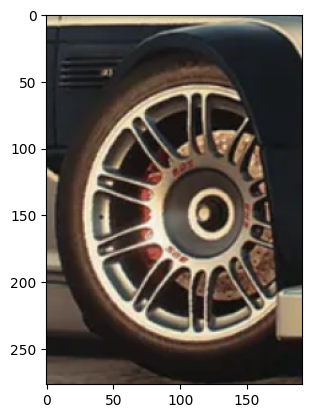

In [15]:
plt.imshow(roda)

# Template Matching Methods

Make sure to watch the video for an explanation of the different methods!

In [16]:
# Imagem base
full = cv2.imread('bmw_m3GTR.png')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# Template a ser detectado
roda = cv2.imread('roda.png')
roda = cv2.cvtColor(roda, cv2.COLOR_BGR2RGB)


# todos os 6 metodos de comparação
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [17]:
height, width,channels = roda.shape

In [18]:
width

192

In [19]:
height

277

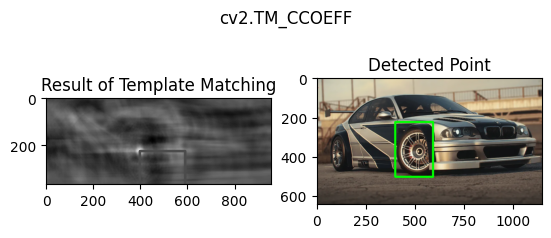

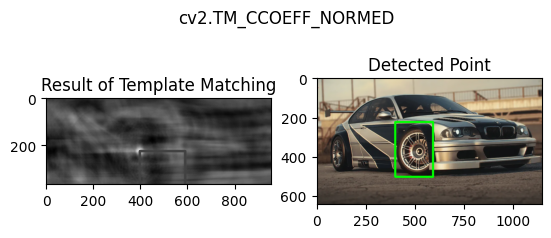

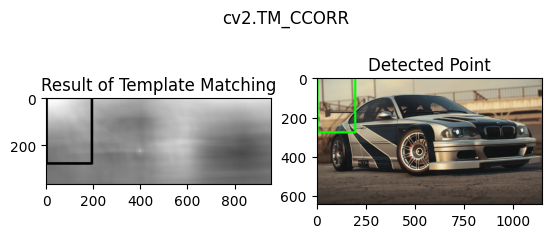

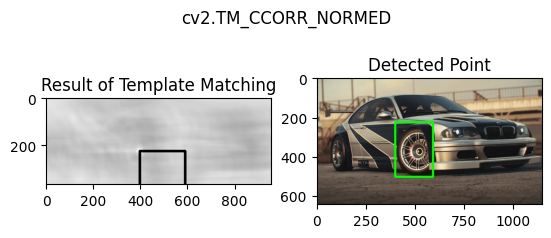

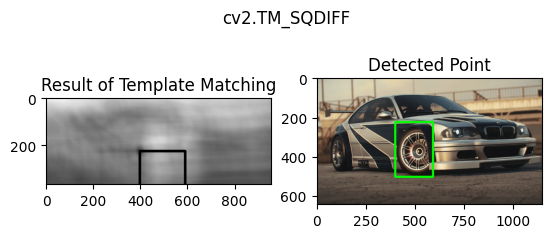

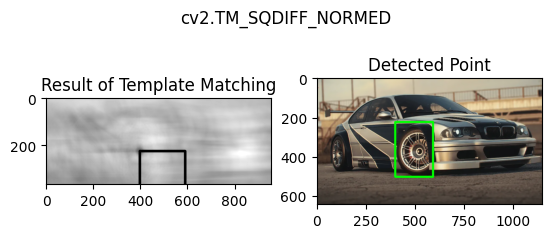

In [21]:
for m in methods:
    
    full_copy = full.copy()
    
    method = eval(m)

    # aplica o template Matching 
    res = cv2.matchTemplate(full_copy,roda,method)
    
    # pega os valores minimos, maximos e a posição
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]: 
        top_left = min_loc    
    else:
        top_left = max_loc
        
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Desenha um retangulo verde em torno do objeto identificado
    cv2.rectangle(full_copy,top_left, bottom_right, (0,255,0), 10)
    cv2.rectangle(res,top_left, bottom_right, (0,255,0), 10)
    
    plt.subplot(221)
    plt.imshow(res,cmap='gray')
    plt.title('Result of Template Matching')
    
    plt.subplot(222)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')
    